# Tutorial: KEGG REST API commands in KEGGutils
## How to make basic requests to KEGG API using intuitive function calls from within your code

## Getting Started

### Installing KEGGutils
`KEGGutils` is available as a **PyPi** package  and can be easily installed using `pip` via `pip install KEGGutils`,
this should be enough to get you going. 
Alternatively you can visit the project's **Github** https://github.com/filippocastelli/KEGGutils and the **PyPi** page https://pypi.org/project/KEGGutils/ for a manual install.

### First things first
Let's import `KEGGutils` with an alias

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
import KEGGutils as kg

check that the latest version of `KEGGutils` is installed

In [3]:
print(kg.__version__)

0.2.0


we should be ready to go!

we can set a directory for our downloaded files, or we can use the default one:

In [4]:
print("Our default download directory is {}".format(kg.download_dir))

Our default download directory is ./kegg_downloads/


please notice that the default directory is a runtime variable, remember to **change it every time `KEGGutils` is reloaded** (maybe we'll change that in the future).  

to ensure that we use the latest available data we can remove all previously downloaded files, if it's your first time using `KEGGutils` you should have no problems.

In [5]:
kg.delete_cached_files()

> deleting the following files from ./kegg_downloads/
./kegg_downloads\C00002-image.gif
./kegg_downloads\compound-C7H10O5-formula
./kegg_downloads\D00564-ddi
./kegg_downloads\ece-info
./kegg_downloads\eco-ncbi-geneid-conv
./kegg_downloads\ecs-ECs1206-aaseq
./kegg_downloads\ecs-ECs1206-description
./kegg_downloads\enzyme-hsa-link
./kegg_downloads\genes-ncbi-geneid-19831932-conv
./kegg_downloads\genes-shiga-toxin
./kegg_downloads\hsa-info
./kegg_downloads\hsa-list
./kegg_downloads\hsa05130-image.png
./kegg_downloads\hsa05130-kgml


## The interesting stuff: KEGG REST API

KEGGutils provides, among its features, the ability to easily interrogate the KEGG  REST API from within your code without having to explicitly handle HTTP requests: this functionality comes in the form of specific methods for each of the KEGG API commands: 

+ `keggapi_list()` for the `LIST` API command
+ `keggapi_info()` for the `INFO` API command
+ `keggapi_find()` for the `FIND` API command
+ `keggapi_get()` for the `GET` API command
+ `keggapi_conv()` for the `CONV` API command
+ `keggapi_link()` for the `LINK` API command
+ `keggapi_ddi()` for the `DDI` API command

for further infos on what any of the API commands do you can visit [KEGG's API instructions page](https://www.kegg.jp/kegg/rest/keggapi.html)

### KEGG API commands: INFO

Let's start from the simplest of them all: the `INFO` instruction that we can easily use with the `keggapi_info()` method.

In [6]:
print(kg.keggapi_info.__doc__)

KEGG REST API interface for INFO command
    Displays information on a given database
    
    for further info read https://www.kegg.jp/kegg/rest/keggapi.html
    
    Parameters
    ----------
    database : str
        database of which you want to obtain infos on
    verbose : bool
        if set to False displays only the first 4 lines of text (default is True)
    force_download :  bool
        forces overwriting on previous cached files (default is False)
    


It basically displays informations on a given database release, the  databases we can get infos on have to be chosen from the following values:

**kegg | pathway | brite | module | ko | genome | genes | vg | ag | ligand | compound | glycan | reaction | rclass | enzyme | network | variant | disease | drug | dgroup | environ**

we can also request informations on a particular organism code database: 
let's try to ask infos on the *Homo Sapiens* gene database using the corresponding KEGG **hsa** organism code.

In [7]:
kg.keggapi_info("hsa")

Infos on hsa from KEGG:

T01001           Homo sapiens (human) KEGG Genes Database
hsa              Release 89.0+/03-23, Mar 19
                 Kanehisa Laboratories
                 38,683 entries

linked db        pathway
                 brite
                 module
                 ko
                 genome
                 enzyme
                 network
                 disease
                 drug
                 ncbi-geneid
                 ncbi-proteinid
                 uniprot



spoiler alert: KEGGutils has a builtin function for displaying a complete list of KEGG organism codes trivially called `get_organism_codes()`

In [8]:
print(kg.get_organism_codes.__doc__)

Returns all KEGG Organism name codes 


let's display the first ten organisms

In [9]:
kg.get_organism_codes()[:10]

['hsa', 'ptr', 'pps', 'ggo', 'pon', 'nle', 'mcc', 'mcf', 'csab', 'rro']

### KEGG API commands: LIST
the second command we're gonna see is `LIST`, we can access it using the `keggapi_list()` method.

In [10]:
print(kg.keggapi_list.__doc__)

Interface for the KEGG API LIST command

    See https://www.kegg.jp/kegg/rest/keggapi.html for usage

    Parameters
    ----------
    database : str
        Database you wish to obtain a list about, one from pathway | brite | module | ko | genome | <org> | vg | ag | compound | glycan | reaction | rclass | enzyme | network | variant | disease | drug | dgroup | environ | organism | <medicus>
    option : str, optional
        'xl' option is applicable only to the 'brite' database for listing binary relation files (the default is None)
    want_descriptions : bool, optional
        If True returns descriptions for each item (the default is False)
    force_download : bool, optional
        If true replaces any pre-existing downloaded file (the default is False)
    
    Returns
    -------
    item, descritpions
        lists for items and their descriptions
    


We can use it to easily get list of all entries in a database, `keggapi_list()` lets you optionally choose wether you want to see all the entries with the respective description or you just need a straightforward list of entries with the `want_descriptions` option (not really masters of choosing option names here).

In [11]:
hsa_list, descriptions = kg.keggapi_list(database = "hsa", want_descriptions = True)

In [12]:
list(zip(hsa_list, descriptions))[:10]

[('hsa:90011',
  'KIR3DX1, KIR3DL0, LENG12; killer cell immunoglobulin like receptor, three Ig domains X1'),
 ('hsa:4549', 'RNR1, MTRNR1, MT-RNR1; s-rRNA'),
 ('hsa:4550', 'RNR2, MTRNR2, MT-RNR2; l-rRNA'),
 ('hsa:105369154', 'PKD1P6-NPIPP1; PKD1P6-NPIPP1 readthrough'),
 ('hsa:401983', 'ZNF847P, gm127; zinc finger protein 847, pseudogene'),
 ('hsa:101926971', 'LINC01284; long intergenic non-protein coding RNA 1284'),
 ('hsa:574', 'BAGE, BAGE1, CT2.1; B melanoma antigen'),
 ('hsa:392133',
  'OR10AC1, OR10AC1P; olfactory receptor family 10 subfamily AC member 1 (gene/pseudogene)'),
 ('hsa:2576', 'GAGE4, CT4.4; G antigen 4'),
 ('hsa:26581', 'DUX5, DUX1; double homeobox 5')]

we can easily create a dictionary for quick reference with each gene and it's description:

In [13]:
genes_dictionary = dict(zip(hsa_list, descriptions))

genes_dictionary["hsa:574"]

'BAGE, BAGE1, CT2.1; B melanoma antigen'

please note that everything you request from KEGG gets saved under`kegg_download_dir` in plain text for easy retrieval when you don't have internet connection or simply don't want to wait for another HTTP request.

The next time we'll call `keggapi_list()` or any of the methods we're preenting in this tutorial `KEGGutils` will automatically read the same cached copy from disk:

In [14]:
 hsa_list = kg.keggapi_list(database = "hsa")

reading from chached file...


unless we explicitly want a fresh copy, and we can request it using the `force_download` option:

In [15]:
 hsa_list = kg.keggapi_list(database = "hsa", force_download = True)

### KEGG API commands: FIND
The `FIND` functionality is readily avilable using `keggapi_find()`

This is one of the most interesting KEGG API funcionalities: it's a search operation that looks for a query in all of a given database entries an associated fields

In [16]:
print(kg.keggapi_find.__doc__)

Interface for the KEGG API FIND command
    
    See https://www.kegg.jp/kegg/rest/keggapi.html for further info
    
    Parameters
    ----------
    database : str
        KEGG database you wish to query on, one from pathway | brite | module | ko | genome | genes | <org> | vg | ag | ligand | compound | glycan | reaction | rclass | enzyme | network | variant | disease | drug | dgroup | environ | <medicus>  
    query : str
        Desired query
    option : str, optional
        if database is "compound" or "drug", possible options are "formula", "exact mass" and "mol_weight" (the default is None)
    want_descriptions : bool, optional
        if set to True returns a list of descriptions for the found items (the default is False,)
    verbose : bool, optional
        if set to True displays additional messages (the default is False)
    force_download : bool, optional
        if set to True replaces any previously downloaded file under the same name (the default is False)
    
    R

We may be interested on knowing which *Escherichia Coli* genes code for [*Shiga toxins*](https://en.wikipedia.org/wiki/Shiga_toxin), we can perform a search on all genes for the words *shiga toxin*

In [17]:
gene_list, descriptions = kg.keggapi_find(database = "genes",
                                          query = "shiga toxin",
                                          want_descriptions = True)

list(zip(gene_list, descriptions))[:10]

[('ece:Z1464',
  'stx2A; shiga-like toxin II A subunit encoded by bacteriophage BP-933W'),
 ('ece:Z1465',
  'stx2B; shiga-like toxin II B subunit encoded by bacteriophage BP-933W'),
 ('ece:Z3343',
  'stx1B; shiga-like toxin 1 subunit B encoded within prophage CP-933V'),
 ('ece:Z3344',
  'stx1A; shiga-like toxin 1 subunit A encoded within prophage CP-933V'),
 ('ecs:ECs1205', 'Shiga toxin 2 subunit A'),
 ('ecs:ECs1206', 'Shiga toxin 2 subunit B'),
 ('ecs:ECs2973', 'Shiga toxin I subunit B'),
 ('ecs:ECs2974', 'Shiga toxin I subunit A'),
 ('ecf:ECH74115_2905', 'shigatoxin 2, subunit B'),
 ('ecf:ECH74115_2906', 'shiga toxin subunit A')]

we can easily verify that the found gene codes are from various E. Coli subspecies using `keggapi_info` on the database identifier `ece`

In [18]:
kg.keggapi_info("ece")

Infos on ece from KEGG:

T00044           Escherichia coli O157 H7 EDL933 (EHEC) KEGG Genes Database
ece              Release 89.0+/03-23, Mar 19
                 Kanehisa Laboratories
                 5,579 entries

linked db        pathway
                 brite
                 module
                 ko
                 genome
                 enzyme
                 ncbi-proteinid
                 uniprot



Another useful example of the ways we can use the `FIND` funcionality is searching registered compounds matching the chemical formula of [*Shikimic Acid*](*https://en.wikipedia.org/wiki/Shikimic_acid) *C7H10O5*:

In [19]:
compounds, formulas = kg.keggapi_find(database = "compound",
                                          query = "C7H10O5",
                                          option = "formula",
                                          want_descriptions = True)

list(zip(compounds, formulas))[:10]

[('cpd:C00493', 'C7H10O5'),
 ('cpd:C04236', 'C7H10O5'),
 ('cpd:C16588', 'C7H10O5'),
 ('cpd:C17696', 'C7H10O5'),
 ('cpd:C18307', 'C7H10O5'),
 ('cpd:C18312', 'C7H10O5'),
 ('cpd:C20961', 'C7H10N2O5'),
 ('cpd:C21281', 'C7H10O5')]

### KEGG API commands: GET

This is probably the most used command in the whole series, you can use it by calling `keggapi_get()`.
I'ts use to retrieve any KEGG database entry in a variety of formats:

In [20]:
print(kg.keggapi_get.__doc__)

Interface for the KEGG API GET command

    for further info read https://www.kegg.jp/kegg/rest/keggapi.html
    
    Parameters
    ----------
    dbentry : str
        KEGG database entry you wish to GET, one from pathway | brite | module | ko | genome | <org> | vg | ag | compound | glycan | reaction | rclass | enzyme | network | variant | disease | drug | dgroup | environ | disease_ja | drug_ja | dgroup_ja | environ_ja | compound_ja
    option : str, optional
        one from aaseq | ntseq | mol | kcf | image | conf | kgml | json (the default is None])
    want_descriptions : bool, optional
        if True returns a list of descriptions for the requested items (the default is False)
    verbose : bool, optional
        is True displays additional messages  (the default is True)
    force_download : bool, optional
        if set to True replaces any file under the same filename (the default is False)
    show_result_image: boo, optional
        if set to True shows the downloaded ima

easiest case: we want to identify what entry `ecs:ECs1206` could possibly be, we can easy ask the KEGG database using the following command

In [21]:
kg.keggapi_get(dbentry = "ecs:ECs1206")

Infos on ecs:ECs1206 from KEGG:

DEFINITION  (RefSeq) Shiga toxin 2 subunit B
ORTHOLOGY   K11007  shiga toxin subunit B
ORGANISM    ecs  Escherichia coli O157:H7 Sakai (EHEC)


if knowing definition, orthology and organism is not enough for us, we can use the `verbose` option that will tell us life, death and miracles about `ecs:ECs1206`:

In [22]:
kg.keggapi_get(dbentry = "ecs:ECs1206", verbose = True)

Infos on ecs:ECs1206 from KEGG:

ENTRY       ECs1206           CDS       T00048
DEFINITION  (RefSeq) Shiga toxin 2 subunit B
ORTHOLOGY   K11007  shiga toxin subunit B
ORGANISM    ecs  Escherichia coli O157:H7 Sakai (EHEC)
PATHWAY     ecs02024  Quorum sensing
            ecs05130  Pathogenic Escherichia coli infection
MODULE      ecs_M00363  EHEC pathogenicity signature, Shiga toxin
BRITE       KEGG Orthology (KO) [BR:ecs00001]
             09140 Cellular Processes
              09145 Cellular community - prokaryotes
               02024 Quorum sensing
                ECs1206
             09160 Human Diseases
              09171 Infectious diseases: Bacterial
               05130 Pathogenic Escherichia coli infection
                ECs1206
             09180 Brite Hierarchies
              09183 Protein families: signaling and cellular processes
               02042 Bacterial toxins [BR:ecs02042]
                ECs1206
            Bacterial toxins [BR:ecs02042]
             Type III t

among the various perks of the `GET` functionality is the ability to easily request amminoacid sequences using the `aaseq` option

In [23]:
description, sequence = kg.keggapi_get(dbentry = "ecs:ECs1206",
                                       option = "aaseq",
                                       want_descriptions = True)

In [24]:
print(sequence)

MKKMFMAVLFALASVNAMAADCAKGKIEFSKYNEDDTFTVKVDGKEYWTSRWNLQPLLQSAQLTGMTVTIKSSTCESGSGFAEVQFNND


or we can easily see what a given compound formula looks like using the `image option`

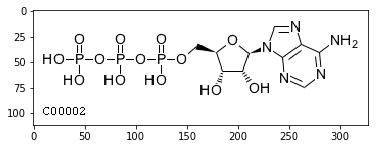

In [25]:
img = kg.keggapi_get(dbentry = "C00002",
              option = "image")

graphical descriptions are also available for **pathways** 

In [26]:
%load_ext autoreload
%autoreload 2

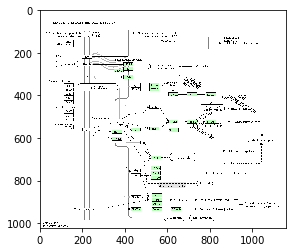

In [27]:
e_coli_infection_pathway_img = kg.keggapi_get(dbentry = "hsa05130", option = "image")

But `GET` can offer us much more than just visualizing pathways, we can obtain (almost) full descriptions in the form of [KGML xml files](https://www.kegg.jp/kegg/xml/) 

In [28]:
kgml = kg.keggapi_get(dbentry = "hsa05130", option = "kgml")

Once downloaded the `xml` file, `KEGGutils` automatically converts it to an `XML ElementTree` for easy manipulation and interrogation, here we just look for the title of the pathway, the KEGG corresponding description url and a link to a graphical representation.

In [29]:
print("Pathway Title:")
print(kgml.getroot().get('title'))
print("Pathway link:")
print(kgml.getroot().get('link'))
print("Pathway image link:")
print(kgml.getroot().get('image'))

Pathway Title:
Pathogenic Escherichia coli infection
Pathway link:
http://www.kegg.jp/kegg-bin/show_pathway?hsa05130
Pathway image link:
http://www.kegg.jp/kegg/pathway/hsa/hsa05130.png


**note** `KEGGutils` also features a full dedicated class for parsing, storing `.xml` `KGML-style` pathways and converting them to easily usable `networkx` Graph, that's called `KEGGpathway`and we'll see it in a different tutorial.

### KEGG API commands: LINK

Ok, we have very nice lists of stuff and several ways to get information of each and every one of the list elements, but the really interesting part is getting to know how it's all tangled together, here comes to the resecue the `LINK` functionality: KEGG `LINK` functionality is used to view the interaction links between two different databases and it's accessible via `keggapi_link()`.

In [30]:
print(kg.keggapi_link.__doc__)

Interface for the KEGG REST API LINK command 
    Given two different database names returns the linked relations between them
    
    for further info read https://www.kegg.jp/kegg/rest/keggapi.html
    
    Parameters
    ----------
    source : str
        source database name
    target : str
        target database name
    verbose : bool, optional
        displays additional infos during the download (the default is True)
    force_download : bool, optional
        forces overwriting over cached files (the default is False)
    
    Raises
    ------
    KEGGKeyError
        if a database key is invalid
    
    Returns
    -------
    link1 : list
        list of source nodes
    link2 : list
        list of target nodes
    


Given two different databases `keggapi_link()` will just return every link that exists between their components

In [31]:
genes, enzymes = kg.keggapi_link("hsa", "enzyme" )

in the form of two lists that we can easily zip together to create another list, a dict, or whatever we want to create

In [32]:
list(zip(genes, enzymes))[:10]

[('hsa:9344', 'ec:2.7.11.1'),
 ('hsa:5894', 'ec:2.7.11.1'),
 ('hsa:673', 'ec:2.7.11.1'),
 ('hsa:5607', 'ec:2.7.12.2'),
 ('hsa:5598', 'ec:2.7.11.24'),
 ('hsa:9020', 'ec:2.7.11.25'),
 ('hsa:51701', 'ec:2.7.11.24'),
 ('hsa:64840', 'ec:2.3.1.250'),
 ('hsa:495', 'ec:7.2.2.19'),
 ('hsa:496', 'ec:7.2.2.19')]

### KEGG API commands: CONV

In an integrated workflow we may want to use different databases other thank just KEGG, how can we make them talk the same language? We use the `CONV` functionality that `KEGGutils` exposes via `keggapi_conv()`.

In [33]:
print(kg.keggapi_conv.__doc__)

 KEGG REST API interface to CONV command
    Converts KEGG codes to and from NCBI ProteinID, NCBI GeneID, Uniprot, CHEBI    and PubChem name standards
    
    for further info read https://www.kegg.jp/kegg/rest/keggapi.html
    
    Parameters
    ----------
    
    source str :
        source database or dbentry
    target str :
        target database or dbentry
    verbose bool : 
        if set to True displays additional messages (defaultis True)
    force_download bool: 
        forces overwriting cached files (default is False)
        
    Returns
    -------
    
    source_codes : list
        list of codes in the original database format
    target_codes : list
        list of codes in the target database format
    
    


The method basically lets you convert to and from external link identifiers single entries or even entire databases: 

Here we want to get a correspondence between the KEGG style `eco` E. Coli genes and their names in the [NCBI GeneID format](https://www.ncbi.nlm.nih.gov/gene)

In [34]:
ncbi_genes, kegg_genes_eco = kg.keggapi_conv("ncbi-geneid", "eco")

in one line we've retrieved the full correspondences between the two formats

In [35]:
list(zip(ncbi_genes, kegg_genes_eco))[:10]

[('ncbi-geneid:944742', 'eco:b0001'),
 ('ncbi-geneid:945803', 'eco:b0002'),
 ('ncbi-geneid:947498', 'eco:b0003'),
 ('ncbi-geneid:945198', 'eco:b0004'),
 ('ncbi-geneid:944747', 'eco:b0005'),
 ('ncbi-geneid:944749', 'eco:b0006'),
 ('ncbi-geneid:944745', 'eco:b0007'),
 ('ncbi-geneid:944748', 'eco:b0008'),
 ('ncbi-geneid:944760', 'eco:b0009'),
 ('ncbi-geneid:944792', 'eco:b0010')]

If we don't need a full database we can just request for a single entry conversion 

In [36]:
ncbi, kegg_eco = kg.keggapi_conv("ncbi-geneid:19831932", "genes")

In [37]:
print("{} NCBI gene is called {} in KEGG ".format(ncbi[0], kegg_eco[0]))

ncbi-geneid:19831932 NCBI gene is called lpn:lpg0366 in KEGG 


## KEGG API commands: DDI

The last of the KEGG API commands is called `DDI` that stands for *Drug-Drug Interaction* and searches for adverse drug-drug interaction for a given drug identifier, we can use it with  the `keggapi_ddi()` method.

In [38]:
print(kg.keggapi_ddi.__doc__)

KEGG REST API interface for the DDI command
    lists drug-drug interactions for a given compound name
    
    Parameters
    ----------
    
    dbentry : str
        drug KEGG database entry
    force_download : bools
        forces overwriting over cached files (default is False)
        
    for further info read https://www.kegg.jp/kegg/rest/keggapi.html


In [39]:
ddi_list = kg.keggapi_ddi("D00564")

In [40]:
ddi_list[:10]

[('dr:D00564', '00050032', '', ''),
 ('dr:D00564', '00058026', '', ''),
 ('dr:D00564', '00058045', '', ''),
 ('dr:D00564', '00059164', '', ''),
 ('dr:D00564', '00060087', '', ''),
 ('dr:D00564', '00060791', '', ''),
 ('dr:D00564', '00062591', '', ''),
 ('dr:D00564', '00062636', '', ''),
 ('dr:D00564', '00065647', '', ''),
 ('dr:D00564', '1406859', '', '')]

we can see our search has returned the original drug, the interacting compound or drug, a type of interaction clasified by controindication (CI) or precaution (P) and an additional classifier tag.

This concludes the overview of KEGG API command mehtod in `KEGGutils`, the many other features will be explained in other tutorials